# 演習問題

In [1]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 5.7MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp36-none-any.whl size=4120275 sha256=52c383d60e90e38150f937bb61b3e9937698c4bba8feffa00a894a2ed3bf2801
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

## 1. 基本的な計算

$2^{16}-1$を計算せよ．

In [3]:
2**16 -1 

65535

## 2. 変数

変数$x = 3, y = 4$を定義して，$x^2 + 2xy + y^2$を計算せよ．

In [4]:
x = 3; y = 4
x**2 + 2*x*y + y**2

49

## 3. 実行制御

### 3.1) for文
for文を使って，$s = \displaystyle \prod_{i=1}^{8} 2$を計算せよ．また，この計算結果と同じ結果を得ることができる演算をプログラムで説明せよ．

In [5]:
s = 1
for i in range(1,9):
  s = s * 2
print(s)

256


In [6]:
2**8

256

### 3.2) if文

$1$から$40$までの小さい順の整数に関して，$3$の倍数と$3$が付く整数には`aho`と表示し，$5$の倍数には`wan`と表示し，この2つの条件を満たす整数には`aho wan`と表示し，それ以外の整数にはその値を表示するプログラムを記述せよ．以下に出力の例を示す．

```
1 2 aho 4 wan aho 7 8 aho wan 11 aho aho 14 aho wan 16 17 aho 19 wan aho 22 aho aho wan 26 aho 28 29 aho wan aho aho aho aho aho wan aho aho aho aho wan
```

In [7]:
result = []
for i in range(1,41):
  if i%15 == 0:
    result.append('aho wan')
  elif (i%3==0) or (str(3) in str(i)):
    result.append('aho')
  elif i%5 == 0:
    result.append('wan')
  else:
    result.append(str(i))
print(' '.join(result))

1 2 aho 4 wan aho 7 8 aho wan 11 aho aho 14 aho wan 16 17 aho 19 wan aho 22 aho aho wan 26 aho 28 29 aho wan aho aho aho aho aho aho aho aho aho wan


### 3.3) while文

[二分法](https://ja.wikipedia.org/wiki/%E4%BA%8C%E5%88%86%E6%B3%95)を使い，$f(x) = x^2 - 2 = 0$の解を$|f(x)| < 10^{-8}$の精度で求めるプログラムを記述せよ．

In [8]:
def f(x):
  return x**2-2

lower = 1
upper = 2
middle = (lower+upper)/2.
while abs(f(middle))>=1e-8:
  if f(lower)*f(middle)<0:
    upper = middle
  else:
    lower = middle
  middle = (lower+upper)/2.
print('解 = ',middle)

解 =  1.4142135605216026


## 4. 関数

### 4.1) 関数の定義

2つの引数$x$と$y$を受け取り，$x^2 + y^2$を戻り値とするsquare関数を定義し，$x = 3, y = 4$を引数としてsquare関数を呼び出せ．

In [9]:
def square(x,y):
  return x**2+y**2

square(3,4)

25

### 4.2) 再帰関数

$x$と$y$を非負整数とする．以下の漸化式を再帰関数で実装し，$c_{8,6}$の値を求めよ．
$$
c_{x,y} = \begin{cases}
1 & (x = 0 \vee y = 0) \\
c_{x-1,y} + c_{x,y-1} & (\mbox{それ以外のとき}) \\
\end{cases}
$$

In [10]:
def c(x,y):
  if (x==0) or (y==0):
    return 1
  else:
    return c(x-1,y)+c(x,y-1)
c(8,6)

3003

### 4.3) 関数オブジェクト

方程式$f(x)=0$の解を[二分法](https://ja.wikipedia.org/wiki/%E4%BA%8C%E5%88%86%E6%B3%95)で求める関数bisectionを実装せよ．ただし，

+ 第1引数（`func`）は値$x$を引数に受け取り，関数の値$f(x)$を戻り値とする関数オブジェクト
+ 第2引数（`a`）は二分法を行う範囲の下限
+ 第3引数（`b`）は二分法を行う範囲の上限

とせよ．また，このbisection関数を用い，$f(x) = x^2 - 2 = 0$の解を求めよ．

In [11]:
def bisection(func,a,b):
  if func(a)*func(b)>0:
    print("f(a)とf(b)の符号が反対となるa,bを入力してください")
    return 
  if a > b:
    tmp = b
    b = a
    a = tmp
  m = (a+b)/2.
  while abs(func(m))>=1e-8:
    if func(a)*func(m)<0:
      b = m
    else:
      a = m
    m = (a+b)/2.
  return m

print(bisection(lambda x:x**2-2,1,2))

1.4142135605216026


## 5. リスト

### 5.1) リストへの要素の追加

$A$を$1$以上$20$以下の$2$の倍数を小さい順に並べたリスト，$B$を$1$以上$20$以下の$3$の倍数を小さい順に並べたリストとする．$A$と$B$の両方に含まれる要素を取り出し，空のリスト$C$に追加せよ．ただし，このプログラムではリスト以外のデータ構造（辞書や集合など）を用いないこととせよ．

In [12]:
A = [i for i in range(1,21) if i%2==0]
B = [i for i in range(1,21) if i%3==0]
C = []
for a in A:
  if a in B:
    C.append(a)
print(A)
print(B)
print(C)
# 別解） 
C_other = [i for i in A if i in B]
print(C_other)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[3, 6, 9, 12, 15, 18]
[6, 12, 18]
[6, 12, 18]


### 5.2) リストの作成
$n = (0, 1, \dots, 16)$に対して$2^n$の値を並べたリストを作成せよ．

In [13]:
L = [2**n for n in range(0,17)]
print(L)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]


### 5.3) 2次元配列

$x$と$y$を非負整数とする．以下の漸化式を[動的計画法](https://ja.wikipedia.org/wiki/%E5%8B%95%E7%9A%84%E8%A8%88%E7%94%BB%E6%B3%95)で実装し，$c_{8,6}$の値を求めよ．
$$
c_{x,y} = \begin{cases}
1 & (x = 0 \vee y = 0) \\
c_{x-1,y} + c_{x,y-1} & (\mbox{それ以外のとき}) \\
\end{cases}
$$

In [14]:
def c_dynamic(x,y):
  c = [[1 for i in range(y+1)] for j in range(x+1)]
  for i in range(1,x+1):
    for j in range(1,y+1):
      c[i][j] = c[i-1][j]+c[i][j-1]
  return c[x][y]

c_dynamic(8,6)

3003

## 6. 文字列

### 6.1) 「サスンリダッルパ」

「サスンリダッルパ」という文字列を定義し，その文字列の1,3,5,7文字目を取り出して連結した文字列を得よ．

In [15]:
source = "サスンリダッルパ"
result = ''.join([source[i] for i in [1,3,5,7]])
print(result)

スリッパ


### 6.2) 「サンダル」＋「スリッパ」＝「サスンリダッルパ」

「サンダル」＋「スリッパ」の文字を先頭から交互に連結して文字列「サスンリダッルパ」を得よ．

In [16]:
s_1 = "サンダル"
s_2 = "スリッパ"
s12 = "".join([s_1[i]+s_2[i] for i in range(len(s_1))])
print(s12)

サスンリダッルパ


### 6.3) フォーマット文字列

身長 (m) を変数`h`で表し，体重 (kg) を変数`w`で表すこととする．体重を身長の二乗で割ったBMI値を求め，身長と体重，BMIの値を「身長=###.#cm, 体重=##.#kg, BMI=##.##」というフォーマットの文字列に変換せよ．ただし，#は数字を表しており，身長と体重は小数点以下1位まで，BMIは小数点以下2位までの表示とせよ．たとえば，`h=1.8`, `w=80`のときは「身長=180.0cm, 体重=80.0kg, BMI=24.69」という文字列を作成したい．

In [17]:
def showBMI(h,w):
  bmi = w/h**2
  print("身長=%3.1fcm,体重=%2.1fkg,BMI=%2.2f"%(h*100,w,bmi))

showBMI(1.8,80)

身長=180.0cm,体重=80.0kg,BMI=24.69


### 6.4) 文字列の分割

"Now I need a drink, alcoholic of course, after the heavy lectures involving quantum mechanics."という文を単語に分解し，各単語の（アルファベットの）文字数を先頭から出現順に並べたリストを作成せよ．

In [18]:
sentence = "Now I need a drink, alcoholic of course, after the heavy lectures involving quantum mechanics"
words = sorted(sentence.split(),key=lambda x:len(x))
print(words)

['I', 'a', 'of', 'Now', 'the', 'need', 'after', 'heavy', 'drink,', 'course,', 'quantum', 'lectures', 'alcoholic', 'involving', 'mechanics']


### 6.5) Typoglycemia

スペースで区切られた単語列に対して，各単語の先頭と末尾の文字は残し，それ以外の文字の順序をランダムに並び替えるプログラムを作成せよ．ただし，長さが４以下の単語は並び替えないこととする．適当な英語の文（例えば"I couldn’t believe that I could actually understand what I was reading : the phenomenal power of the human mind ."）を与え，その実行結果を確認せよ．

In [21]:
import random

def typoglycemia(sequence):
  words = sequence.split()
  outputs = []
  for word in words:
    if len(word)<=4:
      outputs.append(word)
    else:
      w_in = list(word[1:len(word)-1])
      random.shuffle(w_in)
      w_in.insert(0,word[0])
      w_in.append(word[-1])
      outputs.append(''.join(w_in))
  return ' '.join(outputs)

text = "I couldn’t believe that I could actually understand what I was reading : the phenomenal power of the human mind."
print(typoglycemia(text))

I co’lnudt beevile that I culod aaulltcy uradstnend what I was rnieadg : the peamonhenl pweor of the hamun midn.


## 7. 辞書

### 7-1) 出現頻度
"neko no ko koneko, shishi no ko kojishi."という文字列から全ての文字（空白や記号を含む）の出現回数を計測せよ．

In [22]:
s = "neko no ko koneko, shishi no ko kojishi."
alpha = dict()
for a in list(s):
  if a not in alpha:
    alpha[a] = 1
  else:
    alpha[a]+=1
print(alpha)

{'n': 4, 'e': 2, 'k': 6, 'o': 8, ' ': 7, ',': 1, 's': 3, 'h': 3, 'i': 4, 'j': 1, '.': 1}


### 7-2) ユニークなID番号への変換
"neko no ko koneko, shishi no ko kojishi."という文字列からスペース区切りで単語列（記号は単語から除去する）を取り出し，各単語をユニークなID番号の列に変換せよ．このとき，単語をID番号に変換するための辞書と，文字列をID番号列に変換した結果の両方を出力せよ．

In [23]:
text = "neko no ko koneko, shishi no ko kojishi."
text=text.replace(".","")
text=text.replace(",","")
vocab = dict()
id_s = []

for w in text.split():
  if w not in vocab:
    vocab[w]=len(vocab)
  id_s.append(vocab[w])

print(text)
print(id_s)  

neko no ko koneko shishi no ko kojishi
[0, 1, 2, 3, 4, 1, 2, 5]


## 8. ファイルの入出力

### 8.1) ファイルのダウンロード

東京都が公開している[新型コロナウイルス陽性患者のCSVファイル](https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv)をダウンロードせよ．

In [24]:
!wget -O tokyo_covid19.csv https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv 

--2020-12-05 00:47:34--  https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv
Resolving stopcovid19.metro.tokyo.lg.jp (stopcovid19.metro.tokyo.lg.jp)... 162.243.166.170, 159.65.216.232, 2604:a880:400:d1::89c:7001, ...
Connecting to stopcovid19.metro.tokyo.lg.jp (stopcovid19.metro.tokyo.lg.jp)|162.243.166.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3155054 (3.0M) [text/csv]
Saving to: ‘tokyo_covid19.csv’

tokyo_covid19.csv   100%[===================>]   3.01M  3.11MB/s    in 1.0s    

2020-12-05 00:47:35 (3.11 MB/s) - ‘tokyo_covid19.csv’ saved [3155054/3155054]



### 8.2) CSVファイルの読み込み 

ダウンロードしたCSVファイルを読み込み，"患者_年代"列で示される年代別の感染者の総数を求めよ．

In [40]:
import csv

r = {}
with open('tokyo_covid19.csv','r') as fi:
  reader = csv.reader(fi)
  for row in reader:
    r[row[0]] = row[1:]

In [59]:
field = r['\ufeffNo'].index('患者_年代')
ages=dict()
idx = 0
for x in r:
  if idx==0:
    idx+=1
    continue
  else:
    t = r[x][field]
    if t not in ages:
      ages[t]=1
    else:
      ages[t]+=1
    idx+=1

ages

{'-': 2,
 '100歳以上': 12,
 '10代': 1744,
 '10歳未満': 837,
 '20代': 12508,
 '30代': 8914,
 '40代': 6520,
 '50代': 5156,
 '60代': 2876,
 '70代': 2298,
 '80代': 1432,
 '90代': 488,
 '不明': 6}

### 8.3) CSVファイルの書き込み（難易度：高）

ダウンロードしたCSVファイルを読み込み，公表年月日ごとに各年代の感染者数を求め，CSVファイルに保存せよ．なお，余力があればデータが欠損している日付は感染者数が0人として埋めよ．作成されると期待されるファイルの冒頭部分を以下に示す．

```
公表年月日,10歳未満,10代,20代,30代,40代,50代,60代,70代,80代,90代,100歳以上,不明,-,合計
2020-01-24,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2020-01-25,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,1,0,0,0,0,0,0,0,0,0,1
```

2020年12月2日現在で作成したファイルを[tokyo-covid.csv](tokyo-covid.csv)として保存してあるので，実行結果の確認用に用いるとよい．

## 9. NumPy

### 9-1) ベクトルの作成

$n = 1, 2, 3, 4, 5$に対して，$1 / n^2$の値を数列として並べよ．

In [61]:
import numpy as np
v = np.array([1/n**2 for n in range(1,6)])
print(v)

[1.         0.25       0.11111111 0.0625     0.04      ]


### 9-2) ベクトルの和

$\sqrt{6 \displaystyle \sum_{n = 1}^{10000} \frac{1}{n^2}}$を計算せよ（[バーゼル問題](https://ja.wikipedia.org/wiki/%E3%83%90%E3%83%BC%E3%82%BC%E3%83%AB%E5%95%8F%E9%A1%8C)）．

In [62]:
np.sqrt(6*np.sum(np.array([1/n**2 for n in range(1,10000)])))

3.141497154397623

### 9-3) コサイン類似度

2つの位置ベクトル $\boldsymbol{u} = \left(\begin{array}{c}1 & 1 & 1\end{array}\right), \boldsymbol{v} = \left(\begin{array}{c}1 & 2 & 3\end{array}\right)$ のなす角を$\theta$とする．$\cos \theta$の値を求めよ．

In [63]:
def cos_theta(u,v):
  return (np.dot(u,v)/(np.sum(u**2)*np.sum(v**2)))

u = np.array([1,1,1])
v = np.array([1,2,3])
cos_theta(u,v)

0.14285714285714285

### 9-4) ベクトルと行列の積

$X = \left(\begin{array}{c}
0 & 0 & 1  \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 1 \\
\end{array}\right),
\boldsymbol{w} = \left(\begin{array}{c}
1 & 1 & -1.5
\end{array}\right)^\top$
に対して，$\max(X\boldsymbol{w}, \boldsymbol{0})$を計算せよ．ただし，$\max$は複数のベクトルを引数にとり，各要素ごとの最大値を返すものとする．

In [76]:
u = np.array([-1,3,2,-4,5,2])
v = np.array([2,3,-4,12,2,-1])
uv=np.concatenate((u,v),axis=0).reshape(len(u),2)
print(uv)
np.max(uv,axis=1)

[[-1  3]
 [ 2 -4]
 [ 5  2]
 [ 2  3]
 [-4 12]
 [ 2 -1]]


array([ 3,  2,  5,  3, 12,  2])

In [86]:
def max(u,v):
  uv=np.concatenate((u,v),axis=0)
  uv=uv.reshape(2,len(u)).T
  return np.max(uv,axis=1)

X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
w = np.array([1,1,-1.5])
Xw = np.dot(X,w)
print(Xw)
print(np.zeros(len(Xw)))
max(Xw,np.zeros(len(Xw)))

[-1.5 -0.5 -0.5  0.5]
[0. 0. 0. 0.]


array([0. , 0. , 0. , 0.5])

### 9-5) 行列の多項式（2007年京大文系入試問題）

$A = \left(\begin{array}{c}
2 & 4 \\
-1 & -1 \\
\end{array}\right),
E = \left(\begin{array}{c}
1 & 0 \\
0 & 1 \\
\end{array}\right)$とするとき，$A^6 + 2A^4 + 2A^3 + 2A^2 + 2A + 3E$を求めよ．

In [90]:
np.array([A])

array([[[ 2,  4],
        [-1, -1]]])

In [102]:
A = np.array([[2,4],[-1,-1]])
E = np.eye(2)
print("固有多項式を使った結果")
R = A+E
print(R)

print("普通の行列の多項式の計算：")
k = [1,0,2,2,2,2]
An = np.zeros((6,2,2))
#print("init")
#print(An)
An[0]=A
for i in range(1,6):
  An[i]=(np.dot(An[i-1],A))
RR = np.zeros_like(A)
for idx,i in enumerate(k):
  RR = RR + i*An[5-idx]
RR = RR + 3*E
print(RR)

固有多項式を使った結果
[[ 3.  4.]
 [-1.  0.]]
普通の行列の多項式の計算：
[[ 3.  4.]
 [-1.  0.]]


## 10. グラフ

### 10-1) プロット

(1) $\displaystyle \lim_{x \to +0} x^x$を解析的に求め，その計算過程をMarkdownセルにLaTeX形式で記述せよ．

$\displaystyle \lim_{x \to +0} x^x$

$y=x^x$とおくと、$\ln{y}=x\ln{x}$

$\displaystyle \lim_{x \to +0} x\ln{x}$

=$\displaystyle \lim_{x \to +0} \frac{\ln{x}}{1/x}$

=$\displaystyle \lim_{x \to +0} \frac{1/x}{-1/x^2}=0$

よって、$x\to +0$　のとき、$\ln{y}\to 0$　より　$y\to 1$

したがって、$\displaystyle \lim_{x \to +0} x^x=1$

(2) $0 < x \leq 1$の範囲で関数$f(x) = x^x$のグラフを描き，$\displaystyle \lim_{x \to +0} x^x$を図示せよ．ただし，横軸は対数目盛とせよ．

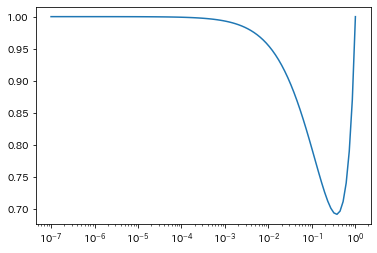

In [113]:
X = np.logspace(-7,0,100)
Y = X**X
import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.xscale("log")
plt.show()

(3) $\displaystyle \lim_{x \to +0} \left(e^{-1/x^2}\right)^x$を解析的に求め，その計算過程をMarkdownセルにLaTeX形式で記述せよ．

$\displaystyle \lim_{x \to +0} \left(e^{-1/x^2}\right)^x = \displaystyle \lim_{x \to +0} e^{-1/x}=\displaystyle \lim_{x \to +0} \frac{1}{e^{1/x}}$

$y=\frac{1}{x}$ とおくと、$x\to +0 , y\to \infty$

$\displaystyle \lim_{y \to \infty} \frac{1}{e^{y}}=0$　であるから、

$\displaystyle \lim_{x \to +0} \left(e^{-1/x^2}\right)^x = 0$

となる。

(4) $0 < x \leq 1$の範囲で関数$f(x) = \left(e^{-1/x^2}\right)^x$のグラフを描き，$\displaystyle \lim_{x \to +0} \left(e^{-1/x^2}\right)^x$を図示せよ．ただし，横軸は対数目盛とせよ．

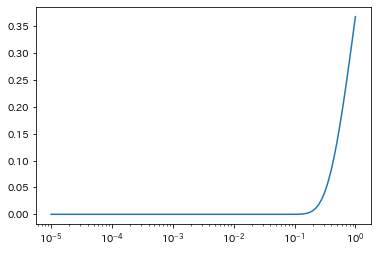

In [116]:
X = np.logspace(-5,0,100)
Y = np.e**(-1/X)
import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.xscale("log")
plt.show()

### 10-2) グラフ

In [ ]:
!wget http://www.chokkan.org/lectures/2020ml/tokyo-covid.csv

(1) 東京都のCOVID-19新規感染者報告数をCSV形式にまとめた[tokyo-covid.csv](tokyo-covid.csv)を読み込み，横軸を公表年月日，縦軸を感染者数として，年代別の感染者数の推移を折れ線グラフで表示せよ．

(2) 東京都のCOVID-19新規感染者報告数をCSV形式にまとめた[tokyo-covid.csv](tokyo-covid.csv)を読み込み，横軸を公表年月日，縦軸を感染者数として，１日の感染者数を棒グラフで示せ．

(2) 東京都のCOVID-19新規感染者報告数をCSV形式にまとめた[tokyo-covid.csv](tokyo-covid.csv)を読み込み，横軸を公表年月日，縦軸を感染者数として，１日の感染者数を折れ線グラフで示せ．このとき，7日間後方移動平均と14日間後方移動平均も折れ線グラフで示せ．